In [70]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import pickle
import os

In [71]:
from google.colab import drive
drive.mount('/content/drive')

!pwd
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content
drive  sample_data  test_set  training_set  X.pkl  y.pkl


In [72]:
#from zipfile import ZipFile

In [4]:
#with ZipFile('drive/MyDrive/CatDog/archive.zip','r') as zipObj:
  #zipObj.extractall('drive/MyDrive/CatDog')

In [5]:
!unzip 'drive/MyDrive/CatDog/archive.zip'

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

In [73]:
Dir = r'/content/training_set/training_set'
Category = ['cats' , 'dogs']


In [74]:
from google.colab.patches import cv2_imshow

Extracting Datasets

In [75]:
imageSize = 100
DataSet = []
for categories in Category:
  folder = os.path.join(Dir , categories)
  label = Category.index(categories)
  for images in os.listdir(folder):
    img = os.path.join(folder , images)
    imgArray = cv.imread(img)
    try:
      imgArray = cv.resize(imgArray , (imageSize , imageSize))
    except:
      break
    DataSet.append([imgArray , label])


In [76]:
print(len(DataSet))


7781


In [77]:
import random
random.shuffle(DataSet)

In [78]:
X = []
y = []

for features,labels in DataSet:
  X.append(features)
  y.append(labels)

In [79]:
y = np.array(y)
X = np.array(X)

In [80]:
print(y) 
print(len(y))

[1 0 1 ... 1 1 1]
7781


In [81]:
pickle.dump(X,open('X.pkl','wb'))
pickle.dump(y,open('y.pkl','wb'))

# **Model Training Starts**

In [82]:
Features = pickle.load(open('X.pkl','rb'))
Labels = pickle.load(open('y.pkl','rb'))
Features = Features/255

In [83]:
from keras.layers import Conv2D,MaxPooling2D,Flatten, Dense
from keras.models import Sequential


In [84]:
model = Sequential()

model.add(Conv2D(64 , (3 , 3) , activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64 , (3 , 3) , activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64 , (3 , 3) , activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128 , input_shape = Features.shape[1:] , activation='relu'))
model.add(Dense(128 , activation='relu'))

model.add(Dense(2 , activation='softmax'))


In [85]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [86]:
model.fit(Features,Labels,epochs=15,validation_split=0.2,batch_size = 31)

Epoch 1/15
201/201 [==============================] - 5s 20ms/step - loss: 0.6772 - accuracy: 0.5667 - val_loss: 0.6595 - val_accuracy: 0.6082
Epoch 2/15
201/201 [==============================] - 4s 18ms/step - loss: 0.6068 - accuracy: 0.6761 - val_loss: 0.6092 - val_accuracy: 0.6602
Epoch 3/15
201/201 [==============================] - 4s 18ms/step - loss: 0.5423 - accuracy: 0.7230 - val_loss: 0.5603 - val_accuracy: 0.6981
Epoch 4/15
201/201 [==============================] - 4s 18ms/step - loss: 0.4943 - accuracy: 0.7606 - val_loss: 0.5080 - val_accuracy: 0.7527
Epoch 5/15
201/201 [==============================] - 4s 18ms/step - loss: 0.4483 - accuracy: 0.7887 - val_loss: 0.5185 - val_accuracy: 0.7437
Epoch 6/15
201/201 [==============================] - 4s 18ms/step - loss: 0.4110 - accuracy: 0.8090 - val_loss: 0.5033 - val_accuracy: 0.7624
Epoch 7/15
201/201 [==============================] - 4s 18ms/step - loss: 0.3409 - accuracy: 0.8466 - val_loss: 0.5047 - val_accuracy: 0.7842

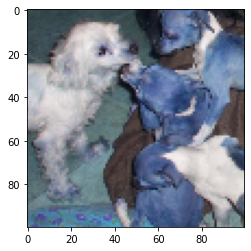

In [87]:
i = 1113
plt.imshow(Features[i])

In [88]:
prediction = model.predict(Features[[i]])
print(f"{prediction}")


[[3.5000803e-06 9.9999654e-01]]


In [89]:
print(np.sum(prediction))
if(prediction[0,0] > prediction[0,1]):
  print("Its a cat")
else:
  print("Its a dog")

1.0
Its a dog



# **TEST DATA**:

(100, 100, 3)


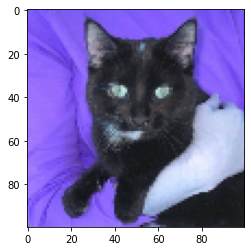

In [90]:
testImage = '/content/test_set/test_set/cats/cat.4515.jpg'
testImage = cv.imread(testImage)
imageSize =  100
try:
  testImage = cv.resize(testImage , (imageSize , imageSize))
  testImage = np.array(testImage)
  testImage.reshape(-1, imageSize, imageSize, 3)

  plt.imshow(testImage)
except:
  print("Unvalid")
testImage = testImage /255
print(testImage.shape)

In [91]:
prediction = model.predict(testImage.reshape(1, 100, 100, 3))
print(f"{prediction}")

[[9.9999976e-01 2.2761252e-07]]


In [92]:
print("Prediction's sum is" , np.sum(prediction))
if(prediction[0,0] > prediction[0,1]):
  print("Its a cat")
else:
  print("Its a dog")

Prediction's sum is 1.0
Its a cat


In [93]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 49, 49, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 10, 10, 64)      